In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import RMSprop, Adam, SGD

## Step1: Reading Data

In [60]:
data = pd.read_csv('data.csv')
data.head()

,ALP,ALT,AST,Age,Albumin,BUN,Bilirubin,Cholesterol,Creatinine,DiasABP,FiO2,GCS,Gender,Glucose,HCO3,HCT,HR,Height,ICUType,K,Lactate,MAP,MechVent,Mg,NIDiasABP,NIMAP,NISysABP,Na,PaCO2,PaO2,Platelets,RecordID,RespRate,SaO2,SysABP,Temp,TroponinI,TroponinT,Urine,WBC,Weight,pH,In-hospital_death
0,77.0,31.0,46.0,54,2.973333,10.500000,0.7,154.0,0.750000,58.795833,0.526667,14.923077,0,160.000000,27.000000,32.500000,70.810811,170.2,4,4.20,1.900000,78.934007,1,1.700000,50.147059,71.559118,114.382353,136.500000,39.666667,138.871212,203.000000,132539.0,17.428571,97.250000,116.891892,37.357143,2.1,0.14,171.052632,10.300000,80.060976,7.387273,0
1,77.0,31.0,46.0,76,2.973333,18.333333,0.7,154.0,1.100000,58.897059,0.560000,13.333333,1,125.500000,22.333333,28.655556,80.794118,175.3,2,3.90,1.900000,76.940299,1,2.300000,56.714286,75.308571,112.500000,137.000000,38.857143,210.142857,178.600000,132540.0,19.000000,96.833333,113.411765,36.939130,2.1,0.14,151.560976,11.266667,80.670588,7.395000,0
2,116.0,83.0,199.5,44,2.500000,4.666667,2.9,154.0,0.333333,67.125000,0.500000,5.923077,0,134.333333,25.000000,28.460000,83.759259,170.2,3,4.26,1.366667,90.437500,1,1.720000,79.000000,96.751316,132.263158,138.333333,35.500000,134.500000,89.666667,132541.0,19.000000,95.000000,125.687500,37.800000,2.1,0.14,124.951220,4.700000,56.700000,7.495000,0
3,105.0,12.0,15.0,68,4.400000,17.666667,0.2,154.0,0.766667,58.795833,0.526667,14.944444,1,117.333333,27.666667,37.442857,70.983333,180.3,3,4.00,1.900000,78.934007,1,2.033333,65.051724,83.885517,121.551724,139.333333,39.666667,138.871212,330.000000,132543.0,15.457627,97.250000,116.891892,36.223077,2.1,0.14,545.833333,9.400000,84.600000,7.387273,0
4,77.0,31.0,46.0,88,3.300000,35.000000,0.7,154.0,1.000000,58.795833,0.526667,15.000000,0,102.500000,19.000000,29.550000,74.958333,170.2,3,4.32,1.900000,78.934007,1,1.550000,45.720930,74.946512,133.395349,139.500000,39.666667,138.871212,103.000000,132545.0,19.166667,97.250000,116.891892,36.880000,2.1,0.14,62.131579,4.300000,80.060976,7.387273,0


In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 43 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ALP                3999 non-null   float64
 1   ALT                3999 non-null   float64
 2   AST                3999 non-null   float64
 3   Age                3999 non-null   int64  
 4   Albumin            3999 non-null   float64
 5   BUN                3999 non-null   float64
 6   Bilirubin          3999 non-null   float64
 7   Cholesterol        3999 non-null   float64
 8   Creatinine         3999 non-null   float64
 9   DiasABP            3999 non-null   float64
 10  FiO2               3999 non-null   float64
 11  GCS                3999 non-null   float64
 12  Gender             3999 non-null   int64  
 13  Glucose            3999 non-null   float64
 14  HCO3               3999 non-null   float64
 15  HCT                3999 non-null   float64
 16  HR                 3999 

In [62]:
data.describe()

,ALP,ALT,AST,Age,Albumin,BUN,Bilirubin,Cholesterol,Creatinine,DiasABP,FiO2,GCS,Gender,Glucose,HCO3,HCT,HR,Height,ICUType,K,Lactate,MAP,MechVent,Mg,NIDiasABP,NIMAP,NISysABP,Na,PaCO2,PaO2,Platelets,RecordID,RespRate,SaO2,SysABP,Temp,TroponinI,TroponinT,Urine,WBC,Weight,pH,In-hospital_death
count,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.0,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000
mean,89.259978,91.709903,130.219258,64.247562,2.975942,25.449665,1.216527,152.403601,1.363130,59.262693,106.243369,11.615267,35.335834,137.087758,23.674534,31.424746,87.122729,169.945036,36.175544,4.136466,2.145524,80.449634,1.0,2.017580,57.209247,76.101723,117.045472,138.861354,40.255572,180.324554,204.987649,137605.348587,19.223967,96.940907,118.145550,36.956291,2.368702,0.337362,133.363074,12.521058,82.799384,7.488870,0.138535
std,70.397850,427.290858,590.482153,17.563142,0.404440,20.586576,2.961385,13.891279,1.406947,9.080069,3858.226228,3.235578,2198.997715,39.938339,4.178864,4.510583,14.550804,14.805887,2113.064930,0.522405,1.792110,11.656091,0.0,0.304457,10.925580,11.306395,18.226100,4.053181,7.012932,2188.040909,102.494600,2922.264561,2.074830,2.296143,16.540816,0.727382,2.418656,1.276145,117.304284,6.466063,23.117431,2.986373,0.345503
min,12.000000,3.000000,6.000000,15.000000,1.100000,2.250000,0.100000,0.000000,0.200000,0.000000,0.276000,1.000000,0.000000,49.000000,9.125000,16.600000,3.000000,1.800000,1.000000,2.500000,0.400000,2.000000,1.0,1.100000,0.000000,0.000000,0.000000,111.500000,16.000000,26.000000,8.200000,132539.000000,10.543478,38.800000,0.000000,21.644615,0.300000,0.010000,0.000000,0.100000,3.500000,6.311667,0.000000
25%,77.000000,31.000000,46.000000,52.500000,2.973333,13.000000,0.700000,154.000000,0.700000,55.843712,0.500000,9.307692,0.000000,112.250000,21.333333,28.300000,77.270209,170.200000,2.000000,3.800000,1.784524,75.481103,1.0,1.840000,50.492031,69.111667,105.812937,136.500000,37.333333,116.900000,137.450000,135078.000000,19.000000,97.230769,111.099359,36.614286,2.100000,0.125000,74.044118,8.900000,68.201064,7.364142,0.000000
50%,77.000000,31.000000,46.000000,67.000000,2.973333,19.000000,0.700000,154.000000,0.933333,58.795833,0.526667,12.428571,1.000000,129.800000,23.666667,30.630952,86.274510,170.200000,3.000000,4.075000,1.900000,78.934007,1.0,2.000000,56.280788,74.751250,115.366987,139.000000,39.666667,138.871212,187.200000,137589.000000,19.000000,97.250000,116.891892,36.968750,2.100000,0.140000,111.032258,11.466667,80.060976,7.387273,0.000000
75%,82.000000,32.250000,49.000000,78.000000,3.000000,30.000000,0.700000,154.000000,1.366667,62.210006,0.562500,14.750000,1.000000,152.250000,26.000000,34.017143,96.473258,170.200000,4.000000,4.400000,2.000000,83.204416,1.0,2.150000,63.166667,81.739195,126.645833,141.000000,42.000000,163.732143,246.900000,140099.500000,19.290323,97.250000,123.504098,37.364401,2.100000,0.140000,160.419207,14.950000,93.040476,7.407500,0.000000
max,1472.333333,9143.428571,15680.000000,90.000000,5.300000,170.833333,46.366667,330.000000,16.457143,106.666667,141264.000000,15.000000,139060.000000,467.333333,96.000000,61.050000,137.842105,431.800000,133628.000000,16.000000,85.000000,265.000000,1.0,6.900000,107.500000,132.540000,234.000000,164.533333,158.000000,138477.000000,925.666667,142673.000000,39.655172,100.000000,181.725000,39.748980,49.200000,24.040000,3082.380952,137.233333,300.000000,128.532500,1.000000


# Step2:  Clean the data
find most important features by Plotting seaborn heatmap

<Figure size 432x288 with 0 Axes>

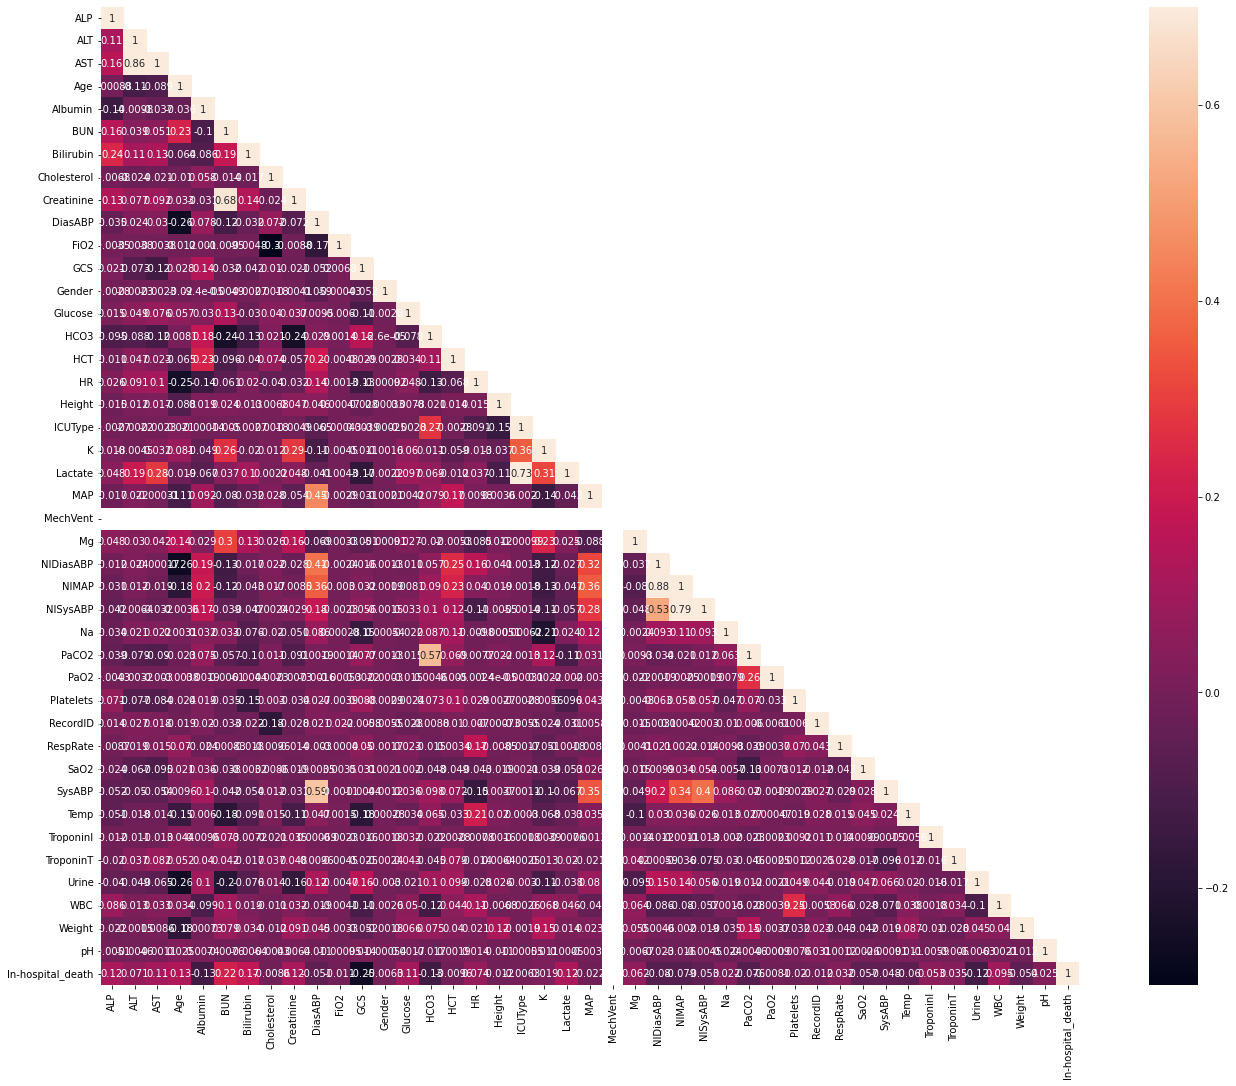

In [63]:
plt.figure()
plt.suptitle("Seaborn heatmap", color='m')
corr_map = data.corr()
obj = np.array(corr_map)
obj[np.tril_indices_from(obj)] = False

fig,ax= plt.subplots()
fig.set_size_inches(25,18)
sns.heatmap(corr_map, mask=obj,vmax=.7, square=True,annot=True, )
plt.show()

By considering the last row, it is obviuos that some features like Gender, Cholesterol, HCT , ICUType, Urine Height are not HIGHLY correlated

In [64]:
data[data.columns[1:]].corr()['In-hospital_death'][:-1]

ALT            0.070992
AST            0.108484
Age            0.130701
Albumin       -0.126925
BUN            0.223369
Bilirubin      0.174017
Cholesterol   -0.008578
Creatinine     0.117615
DiasABP       -0.050506
FiO2          -0.010986
GCS           -0.254104
Gender        -0.006346
Glucose        0.105764
HCO3          -0.129574
HCT           -0.009584
HR             0.073561
Height        -0.012456
ICUType       -0.006314
K              0.018713
Lactate        0.124184
MAP           -0.022010
MechVent            NaN
Mg             0.061766
NIDiasABP     -0.080454
NIMAP         -0.078995
NISysABP      -0.052866
Na             0.021979
PaCO2         -0.075550
PaO2          -0.008070
Platelets     -0.020178
RecordID      -0.011570
RespRate       0.031718
SaO2          -0.056530
SysABP        -0.047688
Temp          -0.059519
TroponinI      0.053133
TroponinT      0.034866
Urine         -0.120881
WBC            0.094936
Weight        -0.054443
pH             0.024961
Name: In-hospita

In [65]:
data.columns

Index(['ALP', 'ALT', 'AST', 'Age', 'Albumin', 'BUN', 'Bilirubin',
       'Cholesterol', 'Creatinine', 'DiasABP', 'FiO2', 'GCS', 'Gender',
       'Glucose', 'HCO3', 'HCT', 'HR', 'Height', 'ICUType', 'K', 'Lactate',
       'MAP', 'MechVent', 'Mg', 'NIDiasABP', 'NIMAP', 'NISysABP', 'Na',
       'PaCO2', 'PaO2', 'Platelets', 'RecordID', 'RespRate', 'SaO2', 'SysABP',
       'Temp', 'TroponinI', 'TroponinT', 'Urine', 'WBC', 'Weight', 'pH',
       'In-hospital_death'],
      dtype='object')

In [66]:
data = data.drop(['Gender', 'Cholesterol', 'HCT' , 'ICUType', 'Height','MechVent'
                  , 'PaO2'], axis = 1)

X = data.iloc[:, :-1]
Y = data.iloc[:, -1]
print(X.shape)

# Before splitting data to train and test, we standardize them
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.3)

(3999, 35)


# Step3: Build the ANN Model and feed it with data

In [70]:
# create model
model = Sequential()

model.add(Dense(64, input_dim=35, activation='relu'))
model.add(Dense(128, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))

model.add(BatchNormalization())

model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='relu'))


# Compile model
sgd = SGD(lr=0.01, momentum=0.8)
model.compile(loss='binary_crossentropy', optimizer= sgd, metrics=['accuracy'])
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 64)                2304      
                                                                 
 dense_41 (Dense)            (None, 128)               8320      
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_42 (Dense)            (None, 256)               33024     
                                                                 
 batch_normalization_8 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 dense_43 (Dense)            (None, 64)                16448     
                                                      

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [71]:
# fit the keras model on the dataset
model.fit(X_train, y_train, epochs=25, batch_size=50, validation_data=(X_test, y_test))

Epoch 1/25
56/56 [==============================] - 1s 7ms/step - loss: 6.3351 - accuracy: 0.5527 - val_loss: 1.8666 - val_accuracy: 0.8767
Epoch 2/25
56/56 [==============================] - 0s 5ms/step - loss: 4.2215 - accuracy: 0.7195 - val_loss: 1.9024 - val_accuracy: 0.8767
Epoch 3/25
56/56 [==============================] - 0s 5ms/step - loss: 4.4952 - accuracy: 0.7038 - val_loss: 1.9024 - val_accuracy: 0.8767
Epoch 4/25
56/56 [==============================] - 0s 4ms/step - loss: 4.0952 - accuracy: 0.7303 - val_loss: 1.9024 - val_accuracy: 0.8767
Epoch 5/25
56/56 [==============================] - 0s 4ms/step - loss: 4.2733 - accuracy: 0.7192 - val_loss: 1.9024 - val_accuracy: 0.8767
Epoch 6/25
56/56 [==============================] - 0s 5ms/step - loss: 2.8293 - accuracy: 0.8146 - val_loss: 1.9024 - val_accuracy: 0.8767
Epoch 7/25
56/56 [==============================] - 0s 4ms/step - loss: 2.3142 - accuracy: 0.8496 - val_loss: 1.9024 - val_accuracy: 0.8767
Epoch 8/25
56/56 [==

## Step4: Validation

In [72]:
score = model.evaluate(X_test, y_test, verbose=0)

print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

Test loss: 1.9024105072021484
Test accuracy: 0.8766666650772095
